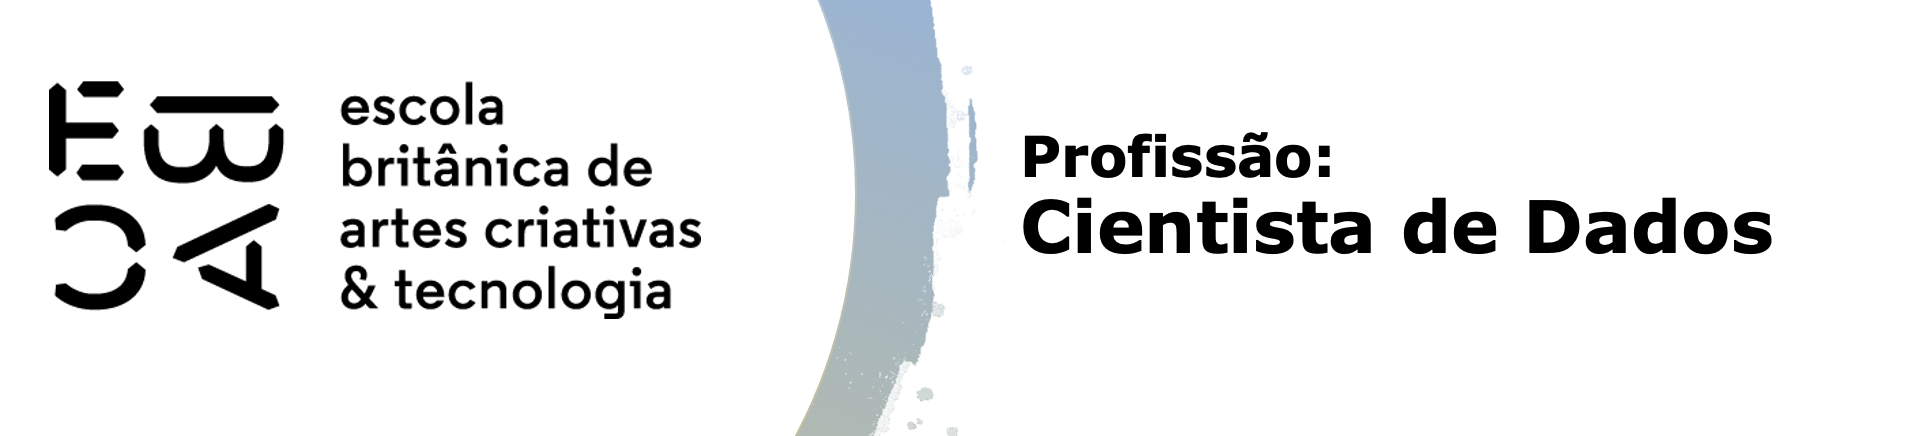

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

In [33]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [34]:
X_train = pd.read_csv('X_train_edit.csv', index_col = [0,1])
X_train.head(1)

,,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
,Subject,,,,,,,,,,,,,,,,,,,,,
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.0304,-0.464761,-0.018446,-0.841247,0.179941,-0.058627


In [35]:
X_test = pd.read_csv('X_test_edit.csv', index_col = [0,1])
X_test.head(1)

,,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
,Subject,,,,,,,,,,,,,,,,,,,,,
0,2,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.33037,-0.705974,0.006462,0.16292,-0.825886,0.271151,-0.720009,0.276801,-0.057978


In [36]:
y_train = pd.read_csv('y_train_edit.csv', index_col = [0,1])
y_train.head(1)

,,0
,Subject,
0,1,5


In [37]:
y_test = pd.read_csv('y_test_edit.csv', index_col = [0,1])
y_test.head(1)

,,0
,Subject,
0,2,5


### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [38]:
X_train_cut = X_train[['53 tGravityAcc-min()-X','382 fBodyAccJerk-bandsEnergy()-1,8','560 angle(Y,gravityMean)']]
X_test_cut = X_test[['53 tGravityAcc-min()-X','382 fBodyAccJerk-bandsEnergy()-1,8','560 angle(Y,gravityMean)']]

In [39]:
path = DecisionTreeClassifier(random_state=100, min_samples_leaf = 20).cost_complexity_pruning_path(X_train_cut, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas

array([0.00000000e+00, 6.59906426e-06, 6.80087051e-06, 8.99098135e-06,
       9.35119695e-06, 9.89217529e-06, 1.08258755e-05, 1.10353748e-05,
       1.75427739e-05, 2.38241675e-05, 3.18341304e-05, 3.69307877e-05,
       4.07553476e-05, 4.18602847e-05, 5.26532445e-05, 5.55018995e-05,
       5.87197700e-05, 6.41224934e-05, 7.20748845e-05, 7.29725943e-05,
       7.34494015e-05, 8.56481444e-05, 8.61634436e-05, 8.84113166e-05,
       8.89002681e-05, 9.39016923e-05, 9.85135044e-05, 9.93339269e-05,
       1.08353426e-04, 1.12003796e-04, 1.12102261e-04, 1.16839113e-04,
       1.22582202e-04, 1.47025120e-04, 1.47143607e-04, 1.50665439e-04,
       1.53540577e-04, 1.74596286e-04, 2.11065827e-04, 2.20689051e-04,
       2.27768134e-04, 2.38088595e-04, 2.49550310e-04, 2.85636561e-04,
       2.88026156e-04, 2.89776222e-04, 2.97189102e-04, 3.50665838e-04,
       3.60123931e-04, 3.62028531e-04, 3.66010486e-04, 4.35255713e-04,
       4.35809630e-04, 4.43756801e-04, 4.45010651e-04, 4.49597283e-04,
      

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [40]:
clf = DecisionTreeClassifier(random_state=100, min_samples_leaf = 20).fit(X_train_cut, y_train)

In [41]:
grid_parametros = {'ccp_alpha':ccp_alphas[::5]}
grid_parametros

{'ccp_alpha': array([0.00000000e+00, 9.89217529e-06, 3.18341304e-05, 5.55018995e-05,
        7.34494015e-05, 9.39016923e-05, 1.12102261e-04, 1.50665439e-04,
        2.27768134e-04, 2.89776222e-04, 3.66010486e-04, 4.49597283e-04,
        5.50766401e-04, 6.21251573e-04, 8.89427640e-04, 1.06036006e-03,
        1.42753784e-03, 1.62275834e-03, 2.16385984e-03, 4.38907334e-03,
        1.03430703e-02, 1.86138242e-01])}

In [42]:
%%time

grid = GridSearchCV(estimator = clf, param_grid=grid_parametros,cv=10)
grid.fit(X_train_cut, y_train)

CPU times: user 3.95 s, sys: 0 ns, total: 3.95 s
Wall time: 3.96 s


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(min_samples_leaf=20,
                                              random_state=100),
             param_grid={'ccp_alpha': array([0.00000000e+00, 9.89217529e-06, 3.18341304e-05, 5.55018995e-05,
       7.34494015e-05, 9.39016923e-05, 1.12102261e-04, 1.50665439e-04,
       2.27768134e-04, 2.89776222e-04, 3.66010486e-04, 4.49597283e-04,
       5.50766401e-04, 6.21251573e-04, 8.89427640e-04, 1.06036006e-03,
       1.42753784e-03, 1.62275834e-03, 2.16385984e-03, 4.38907334e-03,
       1.03430703e-02, 1.86138242e-01])})

In [43]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015307,0.001399,0.001214,0.000252,0.0,{'ccp_alpha': 0.0},0.739130,0.797554,0.808163,0.727891,0.783673,0.717007,0.764626,0.697959,0.854422,0.790476,0.768090,0.045459,18
1,0.014822,0.000654,0.001078,0.000177,0.00001,{'ccp_alpha': 9.892175289345545e-06},0.739130,0.797554,0.808163,0.727891,0.783673,0.717007,0.764626,0.697959,0.854422,0.790476,0.768090,0.045459,18
2,0.015991,0.000707,0.001287,0.000143,0.000032,{'ccp_alpha': 3.183413042732075e-05},0.739130,0.797554,0.808163,0.727891,0.783673,0.717007,0.764626,0.697959,0.854422,0.790476,0.768090,0.045459,18
3,0.016277,0.000613,0.001272,0.000145,0.000056,{'ccp_alpha': 5.550189952419353e-05},0.748641,0.797554,0.808163,0.727891,0.783673,0.717007,0.764626,0.697959,0.854422,0.790476,0.769041,0.044940,12
4,0.016329,0.001301,0.001243,0.000194,0.000073,{'ccp_alpha': 7.344940152339511e-05},0.748641,0.797554,0.808163,0.727891,0.783673,0.717007,0.764626,0.697959,0.854422,0.790476,0.769041,0.044940,12


In [44]:
grid.best_score_

0.8023593241644484

In [45]:
melhor_ccp = resultados.iloc[grid.best_index_,4]
melhor_ccp

0.004389073344928773

### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [46]:
clf = DecisionTreeClassifier(random_state=100, ccp_alpha=melhor_ccp).fit(X_train_cut, y_train)

In [47]:
clf.score(X_test_cut, y_test)

0.7376993552765524

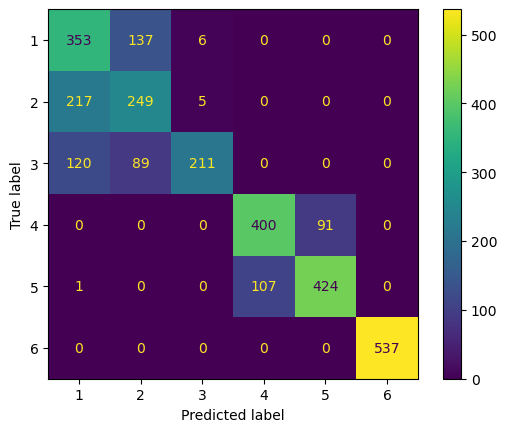

In [48]:
plot_confusion_matrix(clf, X_test_cut, y_test);

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [49]:
# Escolhi a classe 2 que muitas vezes é classificada erroneamente como 1

y_train_dummies = pd.get_dummies(y_train['0'])
y_train_cut = y_train_dummies[2].to_frame()
y_train_cut.head(1)

,,2
,Subject,
0,1,0


In [50]:
clf = DecisionTreeClassifier(random_state=100, min_samples_leaf = 20, max_depth = 4).fit(X_train, y_train_cut)

In [51]:
importancia = pd.Series(clf.feature_importances_, index = X_train.columns)
importancia.sort_values(ascending = False, inplace = True)
importancia.head(3)

74 tGravityAcc-arCoeff()-Z,1      0.336087
331 fBodyAcc-bandsEnergy()-1,8    0.308642
440 fBodyGyro-energy()-X          0.066982
dtype: float64

In [52]:
X_train_cut = X_train[['74 tGravityAcc-arCoeff()-Z,1','331 fBodyAcc-bandsEnergy()-1,8','440 fBodyGyro-energy()-X']]
X_test_cut = X_test[['74 tGravityAcc-arCoeff()-Z,1','331 fBodyAcc-bandsEnergy()-1,8','440 fBodyGyro-energy()-X']]

In [53]:
path = DecisionTreeClassifier(random_state=100, min_samples_leaf = 20).cost_complexity_pruning_path(X_train_cut, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas

array([0.00000000e+00, 6.26536890e-06, 7.68794058e-06, 8.26772494e-06,
       9.97344437e-06, 1.62755875e-05, 2.07470146e-05, 2.85462788e-05,
       3.05715322e-05, 3.24166929e-05, 3.74826031e-05, 4.02752851e-05,
       4.34459928e-05, 4.62738549e-05, 4.84884134e-05, 5.09274489e-05,
       5.11378301e-05, 5.88072250e-05, 6.12078346e-05, 6.22971515e-05,
       6.65955372e-05, 6.85854055e-05, 6.95695110e-05, 7.19893734e-05,
       7.21725034e-05, 7.25584164e-05, 7.31946532e-05, 7.84100365e-05,
       7.88129249e-05, 7.93059746e-05, 8.08880966e-05, 8.10854901e-05,
       8.21992661e-05, 8.53544794e-05, 8.78297929e-05, 8.84113166e-05,
       8.84113166e-05, 8.91384798e-05, 9.04427455e-05, 9.47032840e-05,
       9.79109453e-05, 9.89670749e-05, 9.99969893e-05, 1.02811645e-04,
       1.05553741e-04, 1.05680132e-04, 1.06544679e-04, 1.12362208e-04,
       1.13288960e-04, 1.21944613e-04, 1.22595984e-04, 1.30608850e-04,
       1.31250988e-04, 1.35276796e-04, 1.39401069e-04, 1.40508874e-04,
      

In [54]:
clf = DecisionTreeClassifier(random_state=100, min_samples_leaf = 20).fit(X_train_cut, y_train)

In [55]:
grid_parametros = {'ccp_alpha':ccp_alphas[::5]}
grid_parametros

{'ccp_alpha': array([0.00000000e+00, 1.62755875e-05, 3.74826031e-05, 5.09274489e-05,
        6.65955372e-05, 7.25584164e-05, 8.08880966e-05, 8.84113166e-05,
        9.79109453e-05, 1.05680132e-04, 1.22595984e-04, 1.40508874e-04,
        1.49619151e-04, 1.58197632e-04, 1.64487874e-04, 1.66769461e-04,
        1.80614059e-04, 1.93388893e-04, 2.01836332e-04, 2.25247000e-04,
        2.37164483e-04, 2.47832804e-04, 2.62166891e-04, 2.81973821e-04,
        2.95384881e-04, 3.22370026e-04, 3.35446980e-04, 3.51825864e-04,
        3.81021971e-04, 4.12807753e-04, 4.40802897e-04, 4.68711990e-04,
        5.64016987e-04, 6.55804069e-04, 7.30446294e-04, 7.83993280e-04,
        9.00399367e-04, 1.11381666e-03, 1.46487641e-03, 2.47465690e-03,
        3.58993200e-03, 1.15097969e-02])}

In [56]:
%%time

grid = GridSearchCV(estimator = clf, param_grid=grid_parametros,cv=10)
grid.fit(X_train_cut, y_train)

CPU times: user 9.66 s, sys: 0 ns, total: 9.66 s
Wall time: 9.71 s


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(min_samples_leaf=20,
                                              random_state=100),
             param_grid={'ccp_alpha': array([0.00000000e+00, 1.62755875e-05, 3.74826031e-05, 5.09274489e-05,
       6.65955372e-05, 7.25584164e-05, 8.08880966e-05, 8.84113166e-05,
       9.79109453e-05, 1.05680132e-04, 1.22595984e-04, 1.40508874e-04,
       1.49619151e-04, 1.58197632e-04, 1.64487874e-04, 1.66...
       1.80614059e-04, 1.93388893e-04, 2.01836332e-04, 2.25247000e-04,
       2.37164483e-04, 2.47832804e-04, 2.62166891e-04, 2.81973821e-04,
       2.95384881e-04, 3.22370026e-04, 3.35446980e-04, 3.51825864e-04,
       3.81021971e-04, 4.12807753e-04, 4.40802897e-04, 4.68711990e-04,
       5.64016987e-04, 6.55804069e-04, 7.30446294e-04, 7.83993280e-04,
       9.00399367e-04, 1.11381666e-03, 1.46487641e-03, 2.47465690e-03,
       3.58993200e-03, 1.15097969e-02])})

In [57]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.023097,0.001970,0.001445,0.000285,0.0,{'ccp_alpha': 0.0},0.557065,0.444293,0.512925,0.522449,0.52517,0.495238,0.571429,0.623129,0.598639,0.610884,0.546122,0.053574,32
1,0.019146,0.000489,0.001135,0.000122,0.000016,{'ccp_alpha': 1.6275587548709937e-05},0.557065,0.444293,0.512925,0.522449,0.52517,0.495238,0.571429,0.623129,0.598639,0.610884,0.546122,0.053574,32
2,0.019084,0.000526,0.001130,0.000060,0.000037,{'ccp_alpha': 3.748260312197308e-05},0.557065,0.444293,0.512925,0.521088,0.52517,0.495238,0.571429,0.623129,0.598639,0.610884,0.545986,0.053636,35
3,0.021466,0.002494,0.001520,0.000427,0.000051,{'ccp_alpha': 5.092744894602281e-05},0.557065,0.444293,0.512925,0.521088,0.52517,0.495238,0.571429,0.623129,0.598639,0.610884,0.545986,0.053636,35
4,0.021607,0.003270,0.001415,0.000479,0.000067,{'ccp_alpha': 6.65955372157771e-05},0.557065,0.444293,0.512925,0.521088,0.52517,0.492517,0.571429,0.621769,0.597279,0.610884,0.545442,0.053572,38


In [58]:
grid.best_score_

0.5944036527654541

In [59]:
melhor_ccp = resultados.iloc[grid.best_index_,4]
melhor_ccp

0.002474656903782596

In [60]:
clf = DecisionTreeClassifier(random_state=100, ccp_alpha=melhor_ccp).fit(X_train_cut, y_train)

In [61]:
clf.score(X_test_cut, y_test)

0.5839837122497455

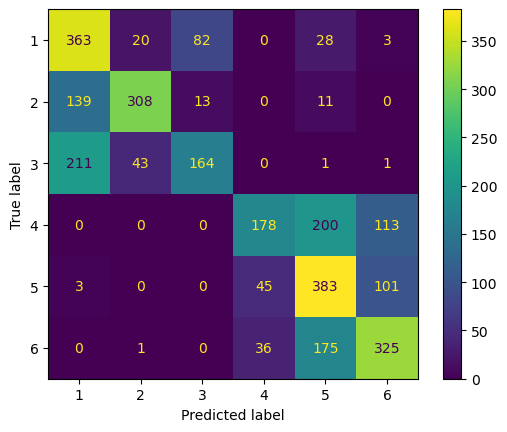

In [62]:
plot_confusion_matrix(clf, X_test_cut, y_test);

- Acurácia anterior apenas da classe 2: 249/(217+249+5) = 52,87%
- Acurácia depois apenas da classe 2: 308/(139+308+13+11) = 65,39%

**Conclusão:** Apesar do modelo anterior possuir acurácia geral maior do que o modelo atual, se desejarmos um modelo apenas para a classe 2 este último acaba sendo melhor que o anterior.